<a href="https://colab.research.google.com/github/jblack333/ML-1/blob/main/Rios-Black_DS_ProjectPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with Keras
###  ICPE 638 - Spring 2024

[Haoyu Niu](https://orcid.org/0000-0002-7052-8877), [Enrique Z. Losoya](https://orcid.org/0000-0001-7763-3349), and [Jian Tao](https://orcid.org/0000-0003-4228-6089)], Texas A&M University.
Updated: Jan. 6, 2024.

**(40 points)**

### **Dataset**
The goal of this assignment is to build a deep neural network model to classify images in the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images classified over 10 classes, with 6,000 images per class. There are 5,0000 training images and 10,000 test images.

The 10 classes are:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

### **Problem**

1. Create two deep neural network models:
   1. One with one dense layer with 512 neurons per layer
   2. One with two dense layers with 256 neurons in each layer.

2. Compile both models by setting the optimizer to **adam** (adaptive moment estimation) and the loss function to **"sparse_categorical_crossentropy"**.

3. Train both models for **20 epochs** and output the **validation error** for both models.

4. Compare the validation error of your models against that of the convolution neural network (CNN) model provided below and explain why the CNN model performs better.

5. **(Extra Credit)**: Modify the CNN model to improve the validation error and discuss your results.

## Load and process the dataset for training
**Please don't change this section!**

You can use `(X_train, y_train) and (X_test, y_test)` for training and testing in your code respectively.

In [1]:
%load_ext tensorboard
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import os, datetime

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


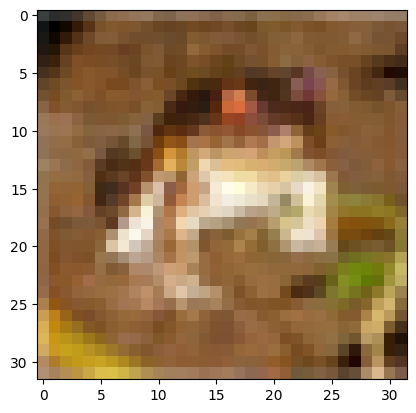

In [3]:
# show the first image in the data set
plt.imshow(X_train[0])

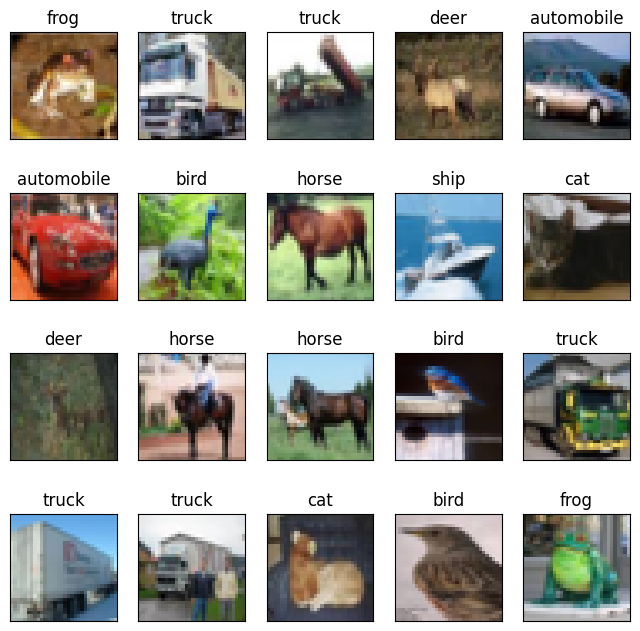

In [4]:
# show the first 15 images in the data set.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    #plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])

In [5]:
# Normalize the train dataset
X_train = utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = utils.normalize(X_test, axis=1)

## Build, compile, and train the model object
You can start creating, compiling, and training your models here.

In [6]:
#Build the model object
model = Sequential()
# Add the Flatten Layer
model.add(Flatten())
# Build the input and the hidden layers
model.add(Dense(512, activation='relu'))
# Build the output layer
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [9]:
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [10]:
model.fit(x=X_train, y=y_train, epochs=20,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback]) # Start training process

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0391 - accuracy: 0.2615 - val_loss: 1.9351 - val_accuracy: 0.2937
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8803 - accuracy: 0.3308 - val_loss: 1.8435 - val_accuracy: 0.3463
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8096 - accuracy: 0.3584 - val_loss: 1.8195 - val_accuracy: 0.3413
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7584 - accuracy: 0.3781 - val_loss: 1.8105 - val_accuracy: 0.3639
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7308 - accuracy: 0.3890 - val_loss: 1.7454 - val_accuracy: 0.3818
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6989 - accuracy: 0.4012 - val_loss: 1.7160 - val_accuracy: 0.3990
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6749 - accuracy: 0.4099 - val_loss: 1.7052 - val_accuracy:

In [28]:
#Build the model object
model = Sequential()
# Add the Flatten Layer
model.add(Flatten())
# Build the input and the hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
# Build the output layer
model.add(Dense(10, activation='softmax'))

In [31]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["Accuracy"])

In [30]:
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [32]:
model.fit(x=X_train, y=y_train, epochs=20,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback]) # Start training process

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0233 - Accuracy: 0.2625 - val_loss: 1.9008 - val_Accuracy: 0.3245
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8560 - Accuracy: 0.3346 - val_loss: 1.8373 - val_Accuracy: 0.3423
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7819 - Accuracy: 0.3642 - val_loss: 1.7986 - val_Accuracy: 0.3657
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7366 - Accuracy: 0.3822 - val_loss: 1.7464 - val_Accuracy: 0.3734
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6967 - Accuracy: 0.3971 - val_loss: 1.7170 - val_Accuracy: 0.3855
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6681 - Accuracy: 0.4080 - val_loss: 1.6786 - val_Accuracy: 0.4029
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6396 - Accuracy: 0.4178 - val_loss: 1.6726 - val_Accuracy:

## Compare against Convolution Neural Network (CNN) Model
**Please don't change this section!**

You just need to run the following to create and train a convolution neural network and compare the validation error to those from your models and explain why CNN is better.

In [11]:
!rm -rf logs/model_cnn
#Build the model object
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs/model_cnn", histogram_freq=1)
model_cnn.fit(x=X_train, y=y_train, epochs=20,
      validation_data=(X_test, y_test),
      callbacks=[tensorboard_callback]) # Start training process

Epoch 1/20
1563/1563 [==============================] - 14s 6ms/step - loss: 1.6563 - accuracy: 0.4011 - val_loss: 1.3605 - val_accuracy: 0.5092
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2735 - accuracy: 0.5503 - val_loss: 1.2050 - val_accuracy: 0.5761
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0878 - accuracy: 0.6205 - val_loss: 1.0461 - val_accuracy: 0.6363
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9901 - accuracy: 0.6545 - val_loss: 1.0000 - val_accuracy: 0.6494
Epoch 5/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9073 - accuracy: 0.6832 - val_loss: 0.9325 - val_accuracy: 0.6782
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8450 - accuracy: 0.7037 - val_loss: 1.0784 - val_accuracy: 0.6354
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7962 - accuracy: 0.7229 - val_loss: 0.9329 - val_accuracy

In [ ]:
# The CNN neural netwroks assume that the imputs are images.
# The CNN uses padding to capture more detail in the image.
# The CNN has more layer instances such as Max Pooling which makes represenations more managable and keeps only the most important information.
# In contrast, The Dense function while still needed, cannot capture the details in the image alone.
# Adjusting for more layers or more neurons, less validation loss occurs when the image is passed through a series of layers in the CNN natwrok.